#**INF6333** - Intelligence Artificielle Appliquée


#**PROJET DE SESSION** : Classification des scènes d'images
#**E. Moukaila SOSSAH - Mamadou DIME**


#Classifier Convolutional Neural Network - CNN - Intel Image Classification

#My Own Drive where Data are located

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
folder = "/content/drive/MyDrive/INF6333_Automne2024/projet_session/"

In [ ]:
!pwd

/content


In [ ]:
!unzip "/content/drive/MyDrive/INF6333_Automne2024/projet_session/archive.zip"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train

In [ ]:
%matplotlib inline
import numpy as np
import os
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from google.colab import files
from google.colab import runtime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

#Data Exploration

In [ ]:
!ls
train_dir = "seg_train/seg_train/"
test_dir = "seg_test/seg_test/"
pred_dir = "seg_pred/seg_pred/"
#Train dir of each class
train_dir_buildings = os.path.join(train_dir,"buildings")
train_dir_forest = os.path.join(train_dir,"forest")
train_dir_glacier = os.path.join(train_dir,"glacier")
train_dir_mountain = os.path.join(train_dir,"mountain")
train_dir_sea = os.path.join(train_dir,"sea")
train_dir_street = os.path.join(train_dir,"street")
#Test dir for each class
test_dir_buildings = os.path.join(test_dir,"buildings")
test_dir_forest = os.path.join(test_dir,"forest")
test_dir_glacier = os.path.join(test_dir,"glacier")
test_dir_mountain = os.path.join(test_dir,"mountain")
test_dir_sea = os.path.join(test_dir,"sea")
test_dir_street = os.path.join(test_dir,"street")

drive  sample_data  seg_pred  seg_test	seg_train


In [ ]:
#Check the number of files on each class for train data
len(os.listdir(train_dir_buildings)),len(os.listdir(train_dir_forest)),len(os.listdir(train_dir_glacier)), len(os.listdir(train_dir_mountain)),len(os.listdir(train_dir_sea)),len(os.listdir(train_dir_street))

(2191, 2271, 2404, 2512, 2274, 2382)

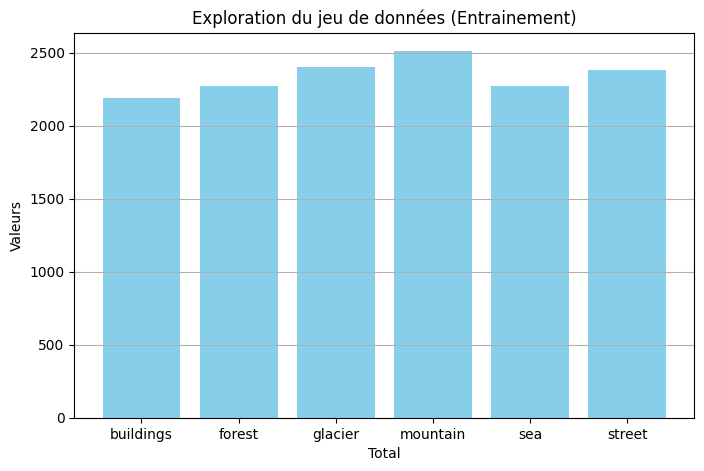

In [1]:
import matplotlib.pyplot as plt

# Data
a = [2191, 2271, 2404, 2512, 2274, 2382]
x = ["buildings", "forest", "glacier", "mountain","sea", "street"]  # Create x values for each data point

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x, a, color='skyblue')
plt.title("Exploration du jeu de données (Entrainement)")
plt.xlabel("Total")
plt.ylabel("Valeurs")
plt.grid(axis='y')
plt.show()


In [ ]:
#Display the statistics of files number with a bar chart (train data)

In [ ]:
len(os.listdir(pred_dir))

7301

In [ ]:
#Check the number of files on each class for test data
len(os.listdir(test_dir_buildings)),len(os.listdir(test_dir_forest)),len(os.listdir(test_dir_glacier)),len(os.listdir(test_dir_mountain)),len(os.listdir(test_dir_sea)),len(os.listdir(test_dir_street))

(437, 474, 553, 525, 510, 501)

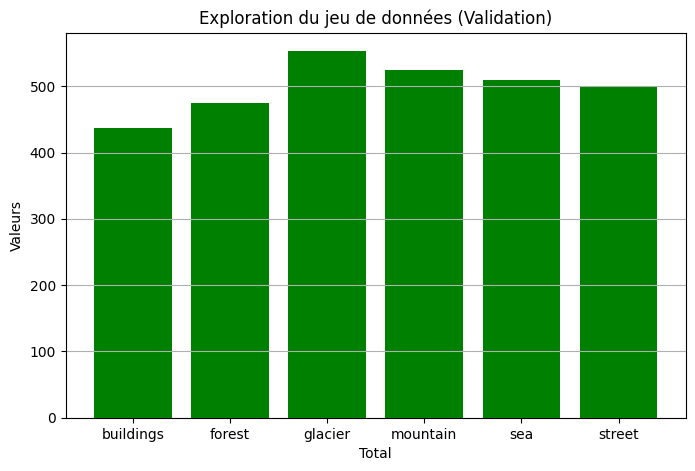

In [2]:
#Show the statistics of files number with a bar chart(test data)
import matplotlib.pyplot as plt

# Data
a = [437, 474, 553, 525, 510, 501]
x = ["buildings", "forest", "glacier", "mountain","sea", "street"]  # Create x values for each data point

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x, a, color='green')
plt.title("Exploration du jeu de données (Validation)")
plt.xlabel("Total")
plt.ylabel("Valeurs")
plt.grid(axis='y')
plt.show()

In [ ]:
total_test_image = len(os.listdir(test_dir_buildings)) + len(os.listdir(test_dir_forest)) + len(os.listdir(test_dir_glacier)) + len(os.listdir(test_dir_mountain)) + len(os.listdir(test_dir_sea)) + len(os.listdir(test_dir_street))

In [ ]:
index_img = 10
img_building = [ os.path.join(train_dir_buildings,filename) for filename in os.listdir(train_dir_buildings)]
img_forest = [ os.path.join(train_dir_forest,filename) for filename in os.listdir(train_dir_forest)]
img_mountain = [ os.path.join(train_dir_mountain,filename) for filename in os.listdir(train_dir_mountain)]
img_sea = [ os.path.join(train_dir_sea,filename) for filename in os.listdir(train_dir_sea) ]
img_glacier = [ os.path.join(train_dir_glacier,filename) for filename in os.listdir(train_dir_glacier)]
img_street = [ os.path.join(train_dir_street,filename) for filename in os.listdir(train_dir_street)]
print(img_building)

['seg_train/seg_train/buildings/16577.jpg', 'seg_train/seg_train/buildings/6748.jpg', 'seg_train/seg_train/buildings/13124.jpg', 'seg_train/seg_train/buildings/4979.jpg', 'seg_train/seg_train/buildings/13982.jpg', 'seg_train/seg_train/buildings/18017.jpg', 'seg_train/seg_train/buildings/4621.jpg', 'seg_train/seg_train/buildings/11627.jpg', 'seg_train/seg_train/buildings/1879.jpg', 'seg_train/seg_train/buildings/3255.jpg', 'seg_train/seg_train/buildings/11990.jpg', 'seg_train/seg_train/buildings/13835.jpg', 'seg_train/seg_train/buildings/12680.jpg', 'seg_train/seg_train/buildings/12999.jpg', 'seg_train/seg_train/buildings/14124.jpg', 'seg_train/seg_train/buildings/14876.jpg', 'seg_train/seg_train/buildings/7758.jpg', 'seg_train/seg_train/buildings/3387.jpg', 'seg_train/seg_train/buildings/14383.jpg', 'seg_train/seg_train/buildings/15905.jpg', 'seg_train/seg_train/buildings/16183.jpg', 'seg_train/seg_train/buildings/15641.jpg', 'seg_train/seg_train/buildings/4600.jpg', 'seg_train/seg_tra

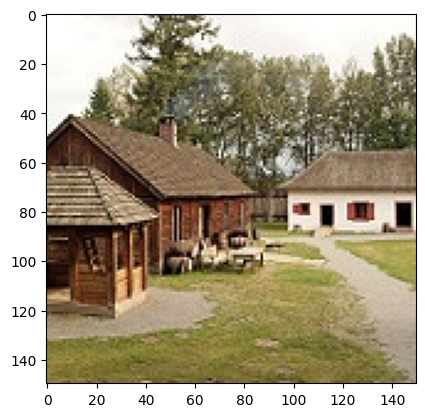

In [ ]:
img_b = mpimg.imread(img_building[index_img])
img_f = mpimg.imread(img_forest[index_img])
plt.imshow(img_b)

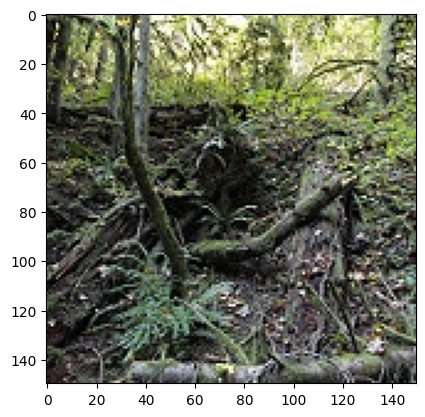

In [ ]:
plt.imshow(img_f)

In [ ]:
image_label_name = ["buildings","forest","glacier","mountain","sea","street"]
image_label_id = [0,1,2,3,4,5]

#Data Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
train_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
             directory=train_dir, #Directory for train classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

#Test Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(
             directory=test_dir, #Directory for test classes images
             target_size=(150,150), #Resize all image to 150*150 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#**1- First CNN Model**

In [ ]:
model1 = tf.keras.models.Sequential([
    #5 round of convolution and MaxPooling
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Transform 2D to 1D with flatten for Dense layer
    tf.keras.layers.Flatten(),
    #Add 3 Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])

In [ ]:
#Check the model and params
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

#Add Callbacks and define threshold

In [ ]:
#best model filename and path
model_path = "best_model_test.h5"
#define callbacks
callback1 = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='accuracy', save_best_only=True)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
class moukailaCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.1):
      print("\nLoss in under 40 percent")
      self.model.stop_training=True

callback3 = moukailaCallback()

In [ ]:
#Compile the model
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

#model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )

In [ ]:
#Adjust the model
history = model1.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=(test_data))

Epoch 1/150
110/110 [==============================] - 32s 220ms/step - loss: 1.3221 - accuracy: 0.4535 - val_loss: 1.0801 - val_accuracy: 0.5707
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 22s 199ms/step - loss: 1.0107 - accuracy: 0.5943 - val_loss: 0.9332 - val_accuracy: 0.6290
Epoch 3/150
110/110 [==============================] - 23s 206ms/step - loss: 0.8598 - accuracy: 0.6672 - val_loss: 0.8074 - val_accuracy: 0.6940
Epoch 4/150
110/110 [==============================] - 22s 204ms/step - loss: 0.7686 - accuracy: 0.7065 - val_loss: 0.7011 - val_accuracy: 0.7477
Epoch 5/150
110/110 [==============================] - 24s 214ms/step - loss: 0.6986 - accuracy: 0.7361 - val_loss: 0.7140 - val_accuracy: 0.7413
Epoch 6/150
110/110 [==============================] - 22s 197ms/step - loss: 0.6364 - accuracy: 0.7670 - val_loss: 0.6582 - val_accuracy: 0.7603
Epoch 7/150
110/110 [==============================] - 22s 204ms/step - loss: 0.5883 - accuracy: 0.7845 - val_loss: 0.6161 - val_accuracy: 0.7790
Epoch 8/150
110/110 [==============================] - 22s 202ms/step - loss: 0.5518 - accuracy: 0.7982 - val_loss: 0.5615 - val_accurac

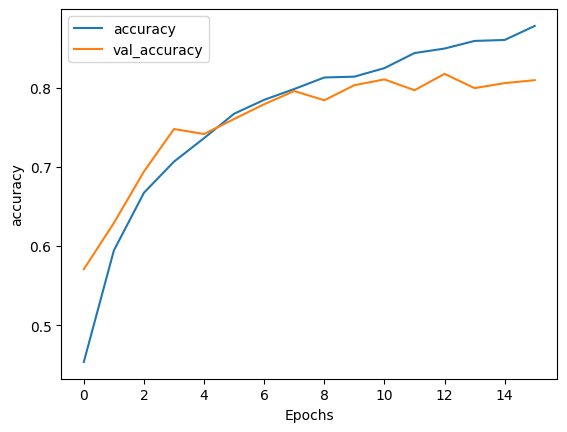

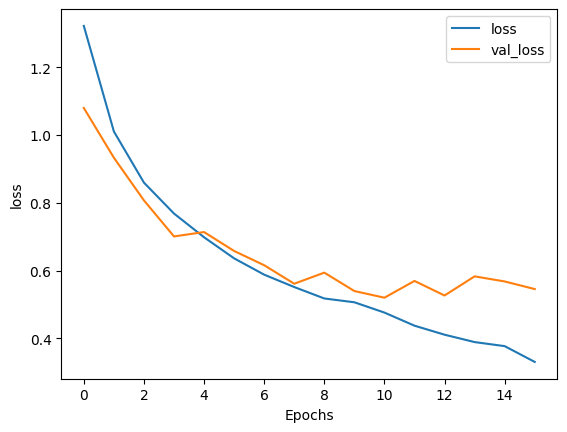

In [ ]:
#Define Plot function
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 4s 146ms/step


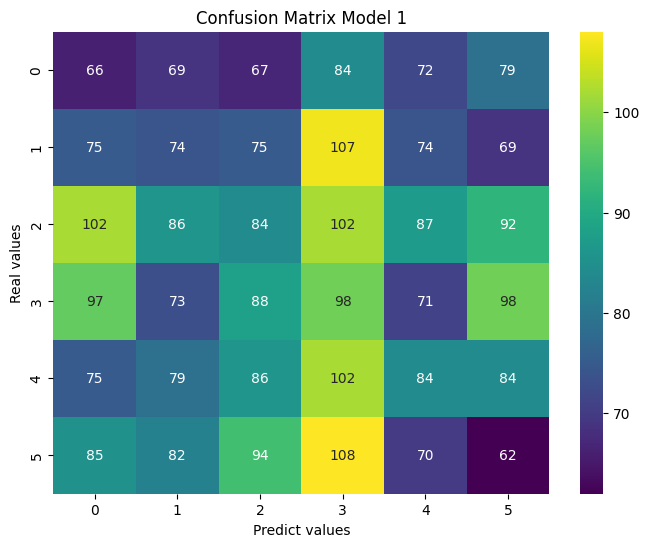

In [ ]:
#Confution Matrix
Y_pred = model1.predict(test_data,total_test_image)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 1')
plt.show()

#**2- Image Compression Impact**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
train_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
             directory=train_dir, #Directory for train classes images
             target_size=(100,100), #Resize all image to 100*100 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

#Test Data/image
#Rescale all the image , normalization (0, 255) to (0, 1)
test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(
             directory=test_dir, #Directory for test classes images
             target_size=(100,100), #Resize all image to 100*100 if not in this format
             batch_size=128,
             class_mode='categorical'# because of multiclass if 2 class we will use binary

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model2 = tf.keras.models.Sequential([
    #3 round of convolution and MaxPooling
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu' padding='valid'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #Transform 2D to 1D with flatten for Dense layer
    tf.keras.layers.Flatten(),
    #Add 3 Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 64)       

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model2.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - 19s 139ms/step - loss: 1.1464 - accuracy: 0.5634 - val_loss: 0.8973 - val_accuracy: 0.6673
Epoch 2/150
110/110 [==============================] - 15s 137ms/step - loss: 0.7764 - accuracy: 0.7104 - val_loss: 0.6862 - val_accuracy: 0.7523
Epoch 3/150
110/110 [==============================] - 15s 135ms/step - loss: 0.6174 - accuracy: 0.7763 - val_loss: 0.6847 - val_accuracy: 0.7443
Epoch 4/150
110/110 [==============================] - 16s 149ms/step - loss: 0.5285 - accuracy: 0.8081 - val_loss: 0.5617 - val_accuracy: 0.7993
Epoch 5/150
110/110 [==============================] - 15s 134ms/step - loss: 0.4483 - accuracy: 0.8410 - val_loss: 0.5567 - val_accuracy: 0.8013
Epoch 6/150
110/110 [==============================] - 15s 139ms/step - loss: 0.3752 - accuracy: 0.8648 - val_loss: 0.5953 - val_accuracy: 0.7953
Epoch 7/150
110/110 [==============================] - 18s 164ms/step - loss: 0.3069 - accuracy: 0.8946 - val_loss: 0.5872 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 15s 135ms/step - loss: 0.1447 - accuracy: 0.9535 - val_loss: 0.6767 - val_accuracy: 0.8107


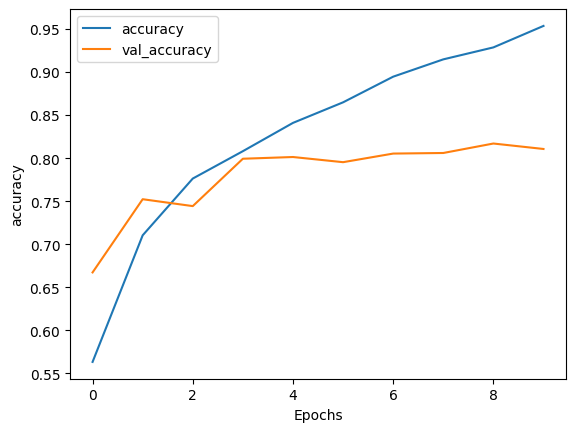

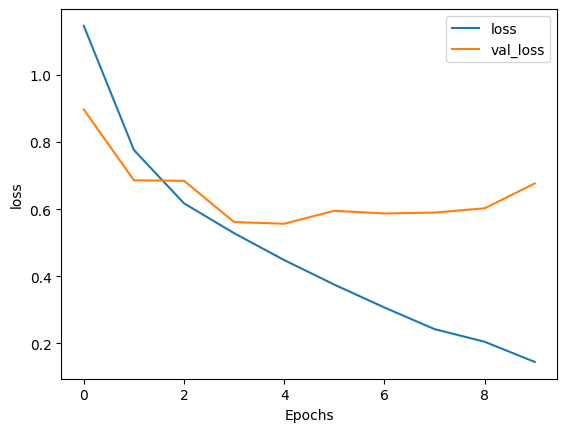

In [ ]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 3s 119ms/step


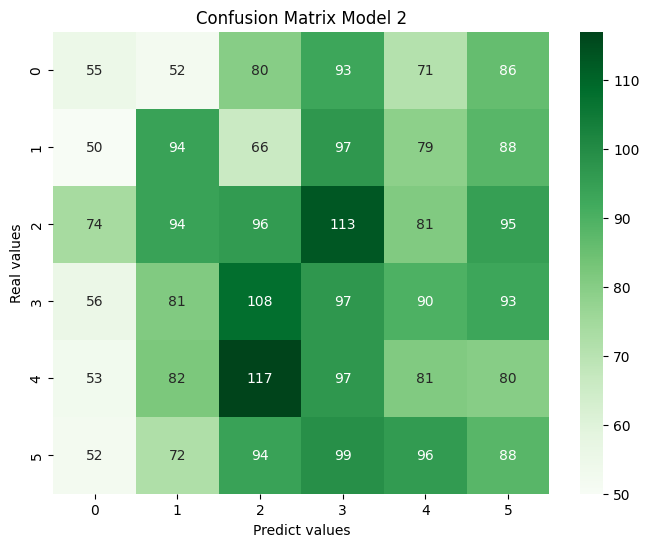

In [ ]:
#Confution Matrix
Y_pred = model2.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 2')
plt.show()

#**3- Data Augmentation Impact**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Use ImageDataGenerator API to perform Data augmentation on train data in order to train much data
train_data_generator = ImageDataGenerator(rescale=1/255,
                                          rotation_range=40,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          shear_range=0.2
                                          )

train_data = train_data_generator.flow_from_directory(directory=train_dir,
                                                                target_size=(150,150),
                                                                class_mode="categorical",
                                                                batch_size=128
                                                              )

test_data_generator = ImageDataGenerator(rescale=1/255)

test_data = test_data_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150,150)
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model3 = tf.keras.models.Sequential([
        #Convolution layer 5 round
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='valid'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Convert 2D to 1D for Dense layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')

])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model3.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - 100s 884ms/step - loss: 1.3501 - accuracy: 0.4414 - val_loss: 1.1991 - val_accuracy: 0.5057
Epoch 2/150
110/110 [==============================] - 97s 882ms/step - loss: 1.0981 - accuracy: 0.5531 - val_loss: 1.0707 - val_accuracy: 0.5947
Epoch 3/150
110/110 [==============================] - 98s 888ms/step - loss: 1.0168 - accuracy: 0.5999 - val_loss: 0.9414 - val_accuracy: 0.6280
Epoch 4/150
110/110 [==============================] - 97s 881ms/step - loss: 0.9364 - accuracy: 0.6387 - val_loss: 0.8437 - val_accuracy: 0.6973
Epoch 5/150
110/110 [==============================] - 99s 897ms/step - loss: 0.9035 - accuracy: 0.6516 - val_loss: 0.7591 - val_accuracy: 0.7120
Epoch 6/150
110/110 [==============================] - 97s 881ms/step - loss: 0.8630 - accuracy: 0.6759 - val_loss: 0.7418 - val_accuracy: 0.7307
Epoch 7/150
110/110 [==============================] - 100s 909ms/step - loss: 0.8176 - accuracy: 0.6933 - val_loss: 0.6921

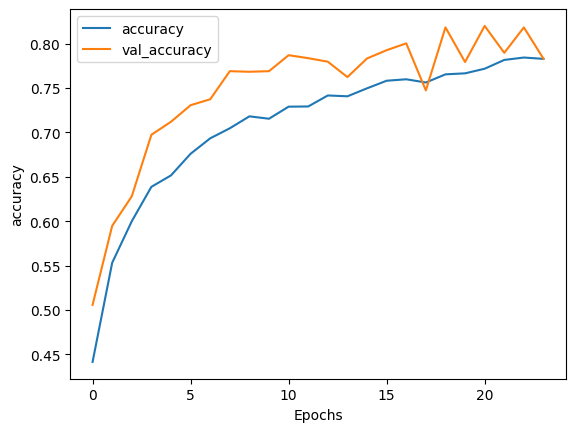

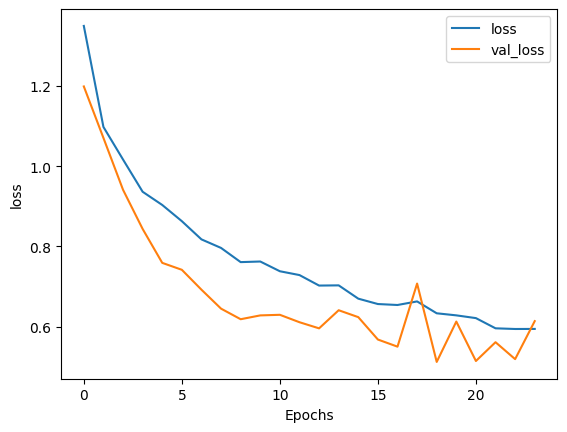

In [ ]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 4s 178ms/step


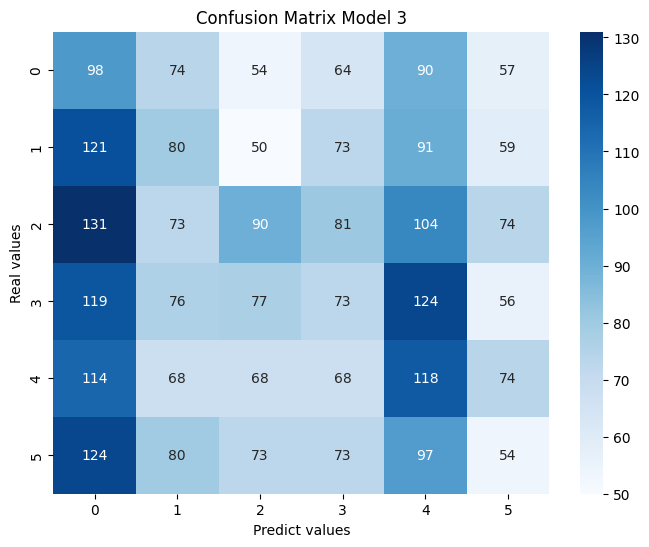

In [ ]:
#Confution Matrix
Y_pred = model3.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 3')
plt.show()

#**4- Transfer Learning**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-04-08 14:24:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.27, 142.250.65.123, 172.217.15.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   100MB/s    in 0.8s    

2024-04-08 14:24:44 (100 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_inceptionv3_file = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pretrained_model = InceptionV3(input_shape=(150,150,3),
                               include_top = False,
                               weights = None)

pretrained_model.load_weights(weights_inceptionv3_file)

for layer in pretrained_model.layers:
  layer.trainable = False

last_layer = pretrained_model.get_layer("mixed10")

output_layer = last_layer.output

#pretrained_model = vgg16.VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)



In [ ]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
#Create the model and use output_layer as input
x = tf.keras.layers.Flatten()(output_layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

model4 = tf.keras.Model(pretrained_model.input, x)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))

In [ ]:
history = model4.fit(train_data, epochs=150, callbacks=[callback1,callback2,callback3], validation_data=test_data)

Epoch 1/150
110/110 [==============================] - ETA: 0s - loss: 5.7915 - accuracy: 0.6714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 858s 8s/step - loss: 5.7915 - accuracy: 0.6714 - val_loss: 0.3898 - val_accuracy: 0.8553
Epoch 2/150
110/110 [==============================] - 851s 8s/step - loss: 0.6442 - accuracy: 0.7797 - val_loss: 0.4021 - val_accuracy: 0.8520
Epoch 3/150
110/110 [==============================] - 802s 7s/step - loss: 0.5385 - accuracy: 0.8087 - val_loss: 0.3753 - val_accuracy: 0.8520
Epoch 4/150
110/110 [==============================] - 814s 7s/step - loss: 0.5001 - accuracy: 0.8227 - val_loss: 0.5153 - val_accuracy: 0.8077
Epoch 5/150
110/110 [==============================] - 818s 7s/step - loss: 0.4790 - accuracy: 0.8297 - val_loss: 0.3145 - val_accuracy: 0.8870
Epoch 6/150
110/110 [==============================] - 807s 7s/step - loss: 0.4547 - accuracy: 0.8420 - val_loss: 0.3195 - val_accuracy: 0.8820
Epoch 7/150
110/110 [==============================] - 814s 7s/step - loss: 0.4464 - accuracy: 0.8410 - val_loss: 0.3129 - val_accuracy: 0.8880
Epoc

KeyboardInterrupt: 

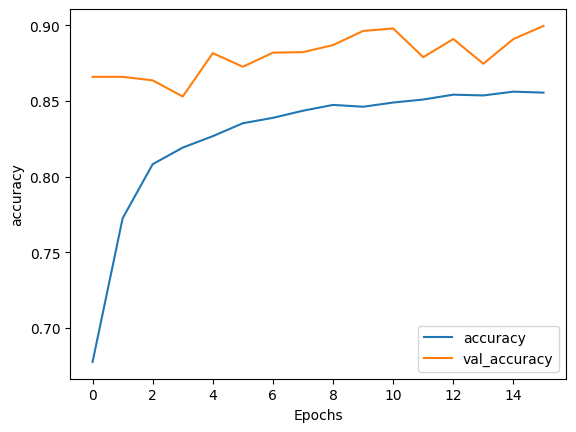

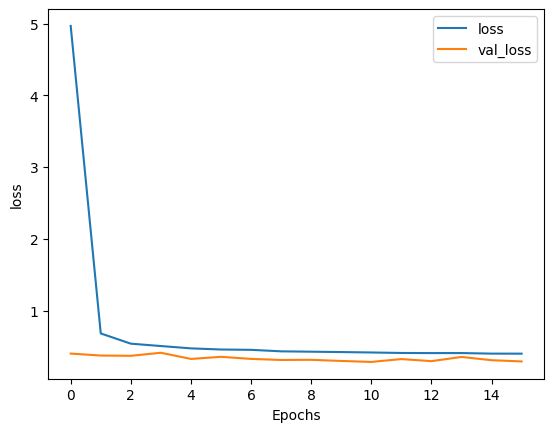

In [ ]:
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

24/24 [==============================] - 8s 327ms/step


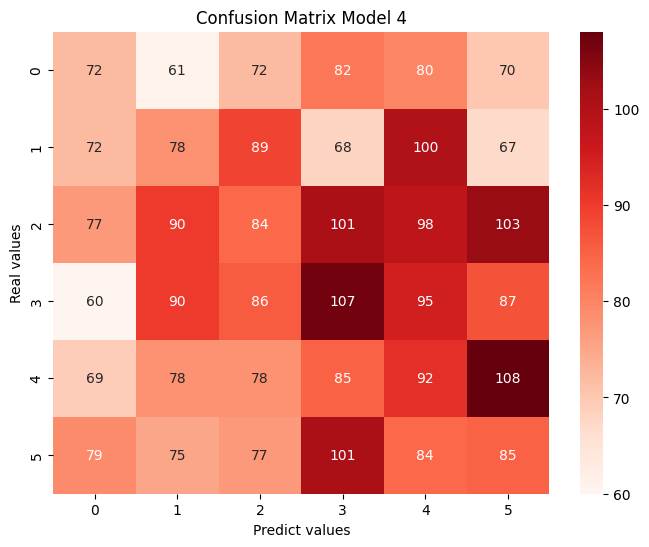

In [ ]:
#Confution Matrix
Y_pred = model4.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_data.classes, y_pred), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.title('Confusion Matrix Model 4')
plt.show()

In [ ]:
#Save Model4
#model4.save("model4.keras")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#Upload best model save on my laptop if not available in /content/
files_uploaded = files.upload()
main_folder = "/content/"

In [ ]:
#Load model save previously in case of not available
model_file = "best_model_test.h5"
model4 = load_model(model_file)

#Perform Prediction with the best Model

In [ ]:
#Upload images for prediction
files_uploaded = files.upload()
main_folder = "/content/"
#best_model = model1
#best_model = model2
#best_model = model3
best_model = model4

#file prediction with best model
for f in files_uploaded.keys():
  path_file = main_folder + f
  image = load_img(path_file, target_size=(150,150))
  x = img_to_array(image)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  #img_resize = cv2.resize(img, (224,224))
  #img_resize = np.expand_dims(img_resize, axis=0)
  prediction = best_model.predict(images, batch_size=10)
  max_id = np.argmax(prediction)
  print(f'The image is classified as : ' + image_label_name[max_id])

Saving 10004.jpg to 10004.jpg
1/1 [==============================] - 0s 128ms/step
The image is classified as : buildings


In [ ]:
#Free up the memory
runtime.unassign()